In [80]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import math

In [211]:
#input
F = open("7.txt","r") 
m = int(F.readline())
n = int(F.readline())

print("m = ", m, " n = ", n)
dataTrain = [[int(e) for e in F.readline().split()] for i in range(0, n)]
print(np.shape(dataTrain))
matrix = np.array(dataTrain)

print(np.shape(matrix))
X, y = matrix[:, :-1], matrix[:, -1]
print("x shape", np.shape(X))
print("y shape", np.shape(y))

m =  185  n =  2698
(2698, 186)
(2698, 186)
x shape (2698, 185)
y shape (2698,)


In [206]:
#theta = (At * A) ^ (-1) * At * y
def reverseMatrix(X, y):
    X = np.hstack(([[1] for e in X], X))
    AtA = X.T.dot(X)
    AtAm = AtA + np.eye(np.shape(AtA)[1]) * 1000
    inv = np.linalg.inv(AtAm)
    return inv.dot(X.T).dot(y)


(2698,)


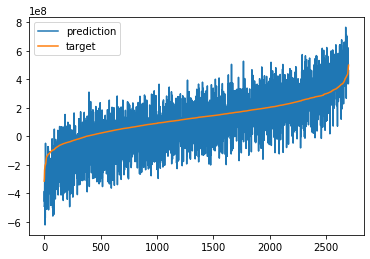

In [216]:
theta = reverseMatrix(X, y)
#predicted = X.T.dot(theta)
predicted = np.hstack(([[1] for e in X], X)).dot(theta)

print(predicted.shape)
plt.plot(predicted, label='prediction')
plt.plot(y, label='target')
plt.legend()
mpl.pyplot.show()

In [225]:
F1 = open("1.txt","r") 
F2 = open("2.txt","r")
F3 = open("3.txt","r") 
F4 = open("4.txt","r") 
F5 = open("5.txt","r") 
F6 = open("6.txt","r") 
F7 = open("7.txt","r") 

def doAllReverse(F):
    m = int(F.readline())
    n = int(F.readline())
    #print(m, n)
    dataTrain = [[int(e) for e in F.readline().split()] for i in range(0, n)]
    matrix = np.array(dataTrain)
    X, y = matrix[:, :-1], matrix[:, -1]
    
    testSize = int(F.readline())
    dataTest = np.array([[int(e) for e in F.readline().split()] for i in range(0, testSize)])
    XTest, yTest = dataTest[:, :-1], dataTest[:, -1]
    
    theta = reverseMatrix(X, y)
    predicted = np.hstack(([[1] for e in XTest], XTest)).dot(theta)
    print(nrmse(XTest, yTest, theta))
    plt.plot(predicted, label='prediction')
    plt.plot(yTest, label='target')
    plt.ylabel('value')
    plt.xlabel('number of test')
    plt.legend()
    mpl.pyplot.show()

0.6501844722886732


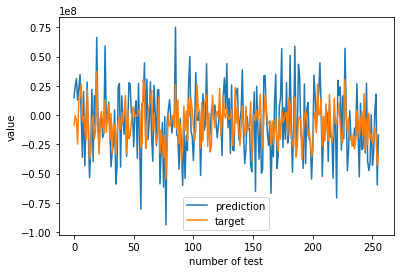

In [226]:
doAllReverse(F2)


0.023477748023004053


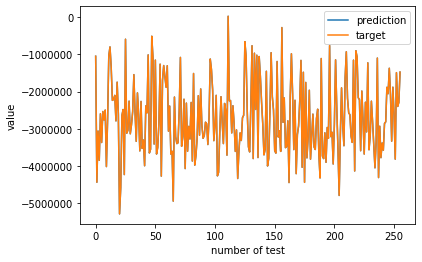

In [227]:
doAllReverse(F3)

0.23971954498885786


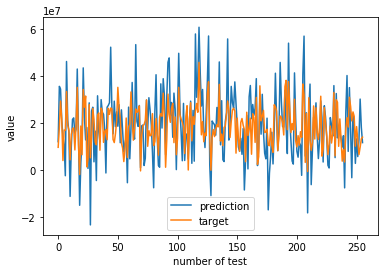

In [228]:
doAllReverse(F4)


In [182]:
def cost(x, y):
    return sum([(a - b) ** 2 for (a, b) in zip(list(x), list(y))])

def grad(X, theta, y):
    minus = (X.dot(theta) - y)
    def fff(aa, x):
        return sum([a*x for a in aa])
    return 2*fff(X.T, minus)

def nrmse(X_test, y_test, theta):    
    n_test, m = X_test.shape
    predicted = np.hstack(([[1] for e in X_test], X_test)).dot(theta)
    sum_errors = sum([(a - b) ** 2 for (a, b) in zip(predicted, y_test)])
    y_max = np.max(y_test)
    return math.sqrt(sum_errors / n_test) / y_max

def gradientDescent(X, y, X_test, y_test, m, alpha):
    X = np.hstack(([[1] for e in X], X))
    y = [[e] for e in y]
    theta = np.array([[0] for i in range(m + 1)])
    nrmse_list = []
    for i in range(0, 1000):
        predicted = X.dot(theta)
        g = grad(X[i % len(X)], theta, y[i % len(X)])
        #tmp = X.dot(g)
        theta = theta - g * alpha
        nrmse_list += [(i, nrmse(X_test, y_test, theta))]
    iterations = [a for (a, b) in nrmse_list]
    nrmses = [b for (a, b) in nrmse_list]
    plt.plot(iterations, nrmses)
    plt.ylabel('NRMSE')
    plt.xlabel('iteration')
    plt.show()
    return theta
#нужен стохастический

In [195]:
F1 = open("1.txt","r") 
F2 = open("2.txt","r")
F3 = open("3.txt","r") 
F4 = open("4.txt","r") 
F5 = open("5.txt","r") 
F6 = open("6.txt","r") 
F7 = open("7.txt","r") 

def doAll(F, alpha):
    m = int(F.readline())
    n = int(F.readline())
    #print(m, n)
    dataTrain = [[int(e) for e in F.readline().split()] for i in range(0, n)]
    matrix = np.array(dataTrain)
    X, y = matrix[:, :-1], matrix[:, -1]
    
    testSize = int(F.readline())
    dataTest = np.array([[int(e) for e in F.readline().split()] for i in range(0, testSize)])
    XTest, yTest = dataTest[:, :-1], dataTest[:, -1]
    
    theta = gradientDescent(X, y,XTest, yTest, m, alpha)
    predicted = np.hstack(([[1] for e in XTest], XTest)).dot(theta)
    
    plt.plot(predicted, label='prediction')
    plt.plot(yTest, label='target')
    plt.ylabel('value')
    plt.xlabel('number of test')
    plt.legend()
    mpl.pyplot.show()

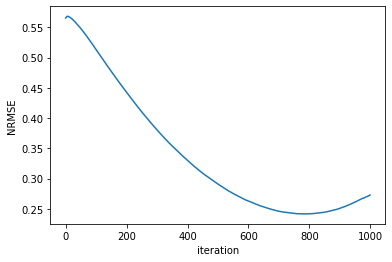

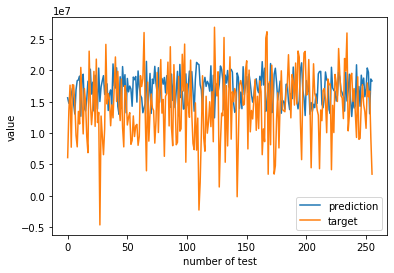

In [154]:
doAll(F1, 1e-18)

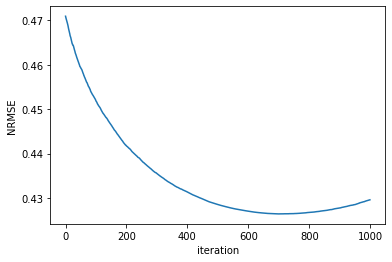

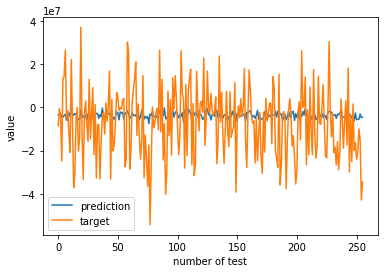

In [151]:
doAll(F2, 1e-18)

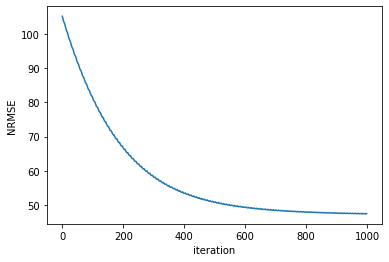

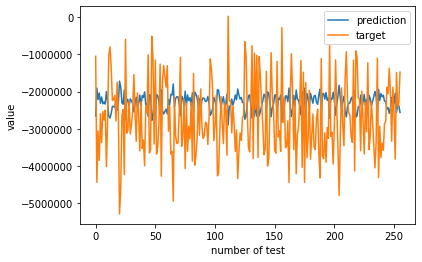

In [148]:
doAll(F3, 1e-15)

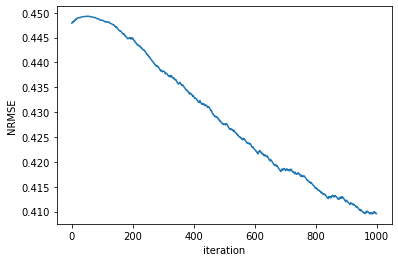

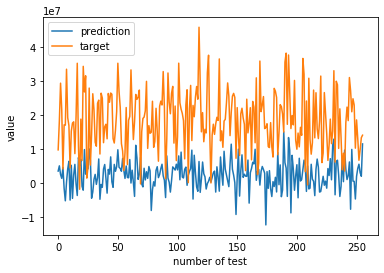

In [167]:
doAll(F4, 1e-17)

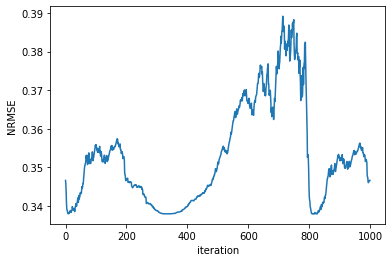

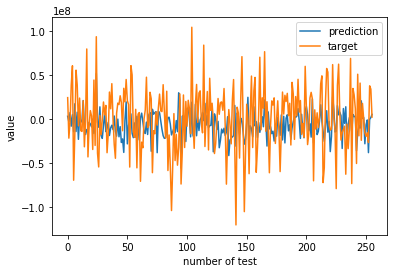

In [184]:
doAll(F5, 1e-17)

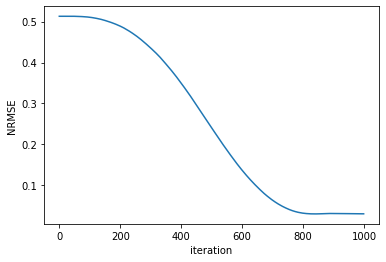

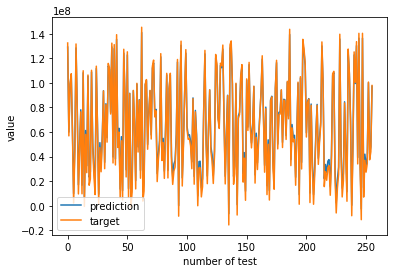

In [189]:
doAll(F6, 1e-19) 

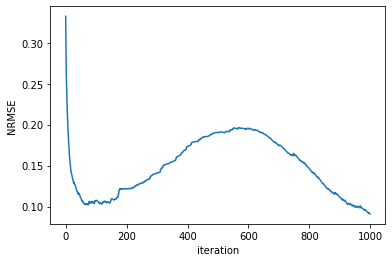

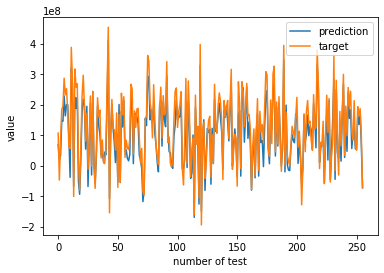

In [196]:
doAll(F7, 1e-17)